## Astro 304 "Galaxies"

## Stellar Population Synthesis (SPS) and stellar mass-to-light ratios

<b>Recommended background reading:</b>
<br>
S 10.3.8-10.3.9 (pp. 482-499) of the Mo, van den Bosch & White book.
<br>
Sections 2 and 3 of <a href="http://adsabs.harvard.edu/abs/2013ARA%26A..51..393C">Conroy (2013)</a> review on modeling galaxy spectra with the SPS techniques

In [2]:
# setup notebook for inline figures
%matplotlib inline

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()


### Star formation histories of galaxies, initial mass function of stars (IMF) and their effects on galaxy mass-to-light ratios. 



From HW 1 we know that absolute magnitude of the Milky Way is $-20.97$ ($h=1$), which for $h=0.7$ translates to:<br>

$$M_r=-20.97-5\log_{10}(0.7)=-20.2$$

Or, in solar luminosities ($M_{r,\odot}=4.67$):

$$L_r = 10^{0.4(M_{\odot,r}-M_r)} \approx 8.9\times 10^{9}\ L_{r,\odot}.$$

So the Milky Way shines in the $r$-band, as roughly 9 billion Suns would. But is the stellar mass then $8.9\times 10^{9}\ M_\odot$?

The answer is <b>no</b>, unless you want an extremely rough estimate. There is a number of reasons why relation between luminosity and stellar mass is direct. 

### Factors influencing relation between luminosity and stellar mass

<br>
1) Stars are born with a wide range of initial masses. The distribution of masses at birth is called the <b>initial mass function (IMF)</b>. Total Lifetime and luminosity of stars at a given time strongly depend on their initial mass. Thus, luminosity of a stellar system will strongly depend on the IMF. 

2) Luminosity of stars depends on the time elapsed since their birth. Thus, luminosity of a stellar system depends on the distribution of ages of its stars. Thus, luminosity of galaxies depends on their <b>star formation history</b>. 

3) Luminosity of stars depends on the abundance of heavy elements in their interiors (aka the <b>metallicity</b>). Thus, 
luminosity of a stellar system of a given mass depends on the distribution of stellar metallicities. 

There is a number of other factors that affect luminosity of stellar systems of a given mass - such as dust extinction - but the above 3 are the most important. 

Here is a diagram illustrating the factors determining the observed galaxy spectrum for a stellar population (Fig 1 of <a href="http://adsabs.harvard.edu/abs/2013ARA%26A..51..393C">Conroy (2013)</a> review on modeling galaxy spectra with the SPS techniques). Here SSP stands for <b>Simple Stellar Population</b> - population of stars born at the same time. CSP stands for <b>Complex Stellar Population</b> - population of stars born at different times and with different metallicities.

<img align=left width=700 src="http://astro.uchicago.edu/~andrey/classes/a304/fig/conroy13_fig1.png"></img>

### Initial Mass Function (IMF) of stars

The initial mass function (IMF) of stars at birth is one of the most important statistics of stellar populations, 
indispensable for modelling observable 
properties of galaxies, interpreting observable properties of galaxies in 
terms of star formation rate or stellar mass, predicting chemical enrichment, etc. 
Although it has long been suspected that IMF should exhibit variations in different 
environments, observational studies showed that the IMF in the Milky Way and other galaxies 
exhibits surprisingly little variation (see, e.g., 
<a href="http://adsabs.harvard.edu/abs/2010ARA%26A..48..339B">Bastian et al. 2010</a> for a recent review). 
The main features of the IMF in the Milky Way are 1) approximately power law distribution of stellar masses at $m>1\ M_{\odot}$ (<a href="http://adsabs.harvard.edu/abs/1955ApJ...121..161S">Salpeter 1955</a>, which becomes progressively shallower at lower masses (<a href="http://adsabs.harvard.edu/abs/1979ApJS...41..513M">Miller & Scalo 1979</a>). Miller & Scalo first showed
that at low masses the IMF is well described by the log-normal distribution, which they have attributed to the stochastic
turbulent medium of giant molecular clouds from which stars form. 
More specifically, the number of stars per logarithmic interval of mass, $\psi=dn/d\ln m$ at $m\gtrsim 0.1\ M_{\odot}$ can be 
described by a log-normal form with the peak mass $m_p$ at masses $m\lesssim 1\ M_{\odot}$ 

and 
by power law $dn/d\ln m\propto m^{-x}$ with $x\approx 1.35$ at larger masses (Chabrier 2003), with $m_{\rm ch}\approx m_p\approx 0.3 M_{\odot}$ 

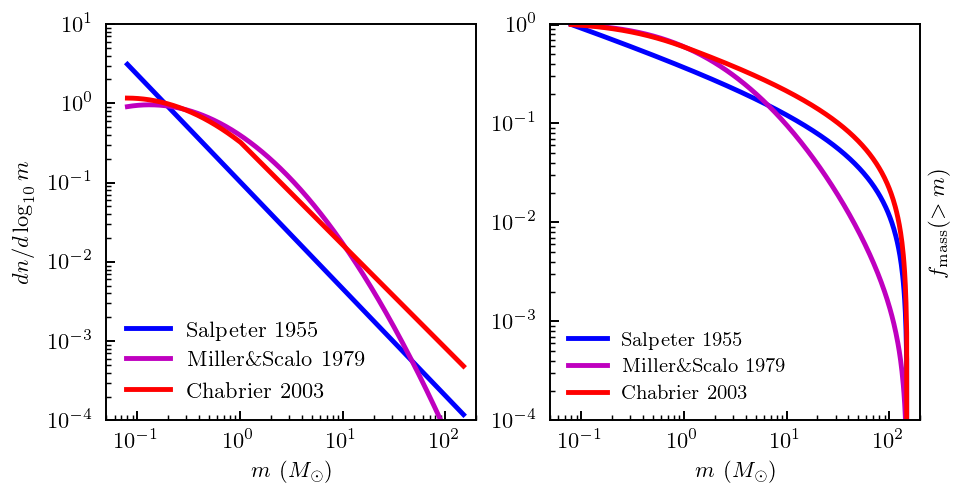

In [9]:
def imf_salpeter(m):
    return np.power(m,-1.35)

def imf_miller_scalo(m):
    ln10 = 2.3025850929940459
    c0 = 93.2; c1 = 1.14; c2 = -0.88
    dummy = c0*np.exp(-c1*(np.log10(m)-c2)**2)
    return dummy

def imf_chabrier03(m):
    # Chabrier 2003, PASP review
    indlarge = (m > 1.0)
    A = 0.158; mc = 0.079; sig = 0.69
    dummy = A*np.exp(-0.5*(np.log10(m/mc))**2/sig/sig)
    dummy[indlarge] = 4.43e-2 * np.power(m[indlarge],-1.3)
    return dummy

mmin = 0.08; mmax = 150.;

x = np.linspace(np.log10(mmin), np.log10(mmax), 500)
x = np.power(10.,x)

xi_salp = imf_salpeter(x)
xi_ms79 = imf_miller_scalo(x)
xi_ch03 = imf_chabrier03(x)

lmmin = np.log10(mmin); lmmax = np.log10(mmax)

def int_salpeter(lm):
    return imf_salpeter(np.power(10.,lm))
def int_ms79(lm):
    return imf_miller_scalo(np.power(10.,lm))
def int_ch03(lm):
    # Chabrier 2003, PASP review
    m = 10.**lm
    if m < 1.0:
        A = 0.158; mc = 0.079; sig = 0.69
        dummy = A*np.exp(-0.5*(np.log10(m/mc))**2/sig/sig)
    else:
        dummy = 4.43e-2 * np.power(m,-1.3)
    return dummy

def fm_salpeter(m):
    return imf_salpeter(m)
def fm_ms79(m):
    return imf_miller_scalo(m)
def fm_ch03(m):
    # Chabrier 2003, PASP review
    if m < 1.0:
        A = 0.158; mc = 0.079; sig = 0.69
        dummy = A*np.exp(-0.5*(np.log10(m/mc))**2/sig/sig)
    else:
        dummy = 4.43e-2 * np.power(m,-1.3)
    return dummy


from scipy import integrate
norm = integrate.quad(int_salpeter,lmmin,lmmax)
xi_salp = xi_salp/norm[0]
norm = integrate.quad(int_ms79,lmmin,lmmax)
xi_ms79 = xi_ms79/norm[0]
norm = integrate.quad(int_ch03,lmmin,lmmax)
xi_ch03 = xi_ch03/norm[0]

fig, ax = plt.subplots(1,2,figsize=(6,3))
plt.rc('font',size=9)
ax[0].set_xlabel ('$m\ (M_{\odot})$')
ax[0].set_ylabel (r'$dn/d\log_{10}m$')

ax[0].set_xlim(0.05, 200.); ax[0].set_ylim(0.0001, 10.)
ax[0].set_xscale('log'); ax[0].set_yscale('log')


ax[0].plot(x, xi_salp,'-', c='b', lw=2.0, label='$\mathrm{Salpeter}\ 1955$')
ax[0].plot(x, xi_ms79,'-', c='m', lw=2.0, label='$\mathrm{Miller \& Scalo\ 1979}$')
ax[0].plot(x, xi_ch03,'-', c='r', lw=2.0, label='$\mathrm{Chabrier\ 2003}$')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels,frameon=False, loc='lower left',fontsize=9)

plt.grid()

ax[1].set_xlabel('$m\ (M_{\odot})$')
ax[1].set_ylabel(r'$f_{\mathrm{mass}}(>m)$')
ax[1].yaxis.set_label_position('right')

fmsalp = []; fmms79 = []; fmch03 = []
norm_salp = integrate.quad(fm_salpeter,mmin,mmax)
norm_ms79 = integrate.quad(fm_ms79,mmin,mmax)
norm_ch03 = integrate.quad(fm_ch03,mmin,mmax)

for i, d in enumerate(x):
    fmsalp.append(integrate.quad(fm_salpeter,x[i],mmax)[0]/norm_salp[0])
    fmms79.append(integrate.quad(fm_ms79,x[i],mmax)[0]/norm_ms79[0])
    fmch03.append(integrate.quad(fm_ch03,x[i],mmax)[0]/norm_ch03[0])

ax[1].set_xlim(0.05, 200.); ax[1].set_ylim(0.0001, 1.01)
ax[1].set_xscale('log'); ax[1].set_yscale('log')

ax[1].plot(x, fmsalp,'-', c='b', lw=2.0, label='$\mathrm{Salpeter}\ 1955$')
ax[1].plot(x, fmms79,'-', c='m', lw=2.0, label='$\mathrm{Miller \& Scalo\ 1979}$')
ax[1].plot(x, fmch03,'-', c='r', lw=2.0, label='$\mathrm{Chabrier\ 2003}$')
plt.legend(frameon=False, fontsize=8, loc='lower left')
plt.grid()
plt.savefig('fig/IMF_models.png',bbox_inches='tight')
plt.show()

Here are the plots of different parametrization of the IMF shown in two ways: 1) number density of stars per $\log_{10} M_\star$ interval and 2) as a fraction of total mass of stellar population in stars with masses larger than a given $m$. 

Salpeter IMF has more low-mass stars, while Chabrier IMF has more high-mass stars.

<img width=700 src="http://astro.uchicago.edu/~andrey/classes/a304/fig/IMF_models.png"></img>

### Observational constraints on the slope of the IMF at different initial stellar masses

Fig. 2 from the review by <a href="http://adsabs.harvard.edu/abs/2010ARA%26A..48..339B">Bastian et al. (2010)</a>. y-axis shows the logarithmic slope of the IMF as a function of stellar mass (x-axis). Within the Milky Way observations are consistent with a single IMF, but there is now increasing observational evidence, hotly debated, that IMF may be varying across galaxies, in particular in the centers of massive ellipticals. 

<img width=700 src="http://astro.uchicago.edu/~andrey/classes/a304/fig/bastian10_imf_obs.png"></img>


#### Star formation histories of galaxies

A key input into SPS calculation of a galaxy's SED is its star formation history (SFH). We are still learning about what these look like for real galaxies. Sometimes, when simulation or semi-analytic model predict a history, this can be used in the SPS modelling to make prediction about observable properties of galaxies. However, in the SPS modelling of observations simplistic SFH models are usually used. 

Below I review a few such simple analytic models that are in frequent use. These are necessarily simplistic and do not capture all of the details of the actual SFHs. Their role is to capture the main features with as few parameters as possible. 



<i><u>$\tau$-model</u></i>. Historically, SFHs of galaxies were modelled using simplistic scenarios: constant SFR, single age burst, exponentially decaying star formation. The latter in particular is called the $\tau$-model in the literature and has star formation rate decreasing after some initial time $t_i$ as 
$$\Psi(t-t_i,\tau)\propto\exp\left [-\frac{(t-t_i)}{\tau}\right]$$
This model, in which star formation increases from zero abrubptly and then decays exponentially is what one gets for a galaxy that starts off with a given gas mass but never accretes or expels the gas, but rather consumes it at a constant <b>depletion time</b>: $\tau=M_{\rm gas}/\dot{M}_\star$. 

This model worked pretty well for spheroidal systems with old stellar populations and this is where it was applied most often. With suitable scaling of formation time $t_i$ and $\tau$ the model can, in principle, fit a wide range of galaxies (<a href="http://adsabs.harvard.edu/abs/2007ApJ...660L..47N">Noeske et al. 2007</a>). The nice thing about the $\tau$ model is that it has only two free parameters: $t_i$ and $\tau$. 

<i><u>Delayed $\tau$ model</u>.</i> Recently, however, studies at high redshift shown that the rise at high $z$ is not so abrupt and proposed to model SFHs with a linear-exponential model (<a href="http://adsabs.harvard.edu/abs/2010ApJ...725.1644L">Lee et al. 2010</a>, <a href="http://adsabs.harvard.edu/abs/2014ApJ...783...81L">Lee et al. 2014</a>):

$$\Psi(t-t_i,\tau)\propto\frac{t-t_i}{\tau^2}\exp\left[-\frac{(t-t_i)}{\tau}\right]$$
This model has two free parameters: $\tau$ and $t_i$ (plus the overall normalization $A$ which is trivial and is present for all models). 

<i><u>Log-normal model</u></i> <a href="http://adsabs.harvard.edu/abs/2015ApJ...801L..12A">Abramson et al. (2015)</a> use a simple log-normal function of time to describe SFHs of galaxies: 
$$
\Psi(t)\propto \frac{1}{\sqrt{2\pi}\tau}\frac{\exp\left[-(\ln t-\ln t_0)^2/(2\tau^2)\right]}{t}
$$
which has 2 free parameters, the width $\tau$ and the peak time $t_0$. It is argued by Mike Gladders, Louis Abramson and others that this functional form describes star formation histories of observed galaxies and galaxies in galaxy formation simulations well (see, e.g., <a href="https://arxiv.org/abs/1701.02308">Diemer et al. 2017</a>).


The attractive feature of the exponential, linear-exponential and log-normal models is their small number of parameters. One could fit these models having just three observables.

<i><u>B13 model</u>.</i> <a href="http://adsabs.harvard.edu/abs/2013ApJ...770...57B">Behroozi et al. (2013)</a> proposed a parametrisation of the SFH based on analysis of average SFHs of galaxy populations derived from the evolution of observed galaxy stellar mass functions, speciﬁc star formation rates and global cosmic star formation rate. The model has a power law rise of SFR followed by power law decline (hereafter the B13 model):
$$\Psi(t,\tau,B,C)\propto \frac{1}{[(t/\tau)^B+(t/\tau)^{-C}]}$$
This model has three free parameters: $\tau$, $B$, and $C$ (plus the overall normalization $A$ which is trivial and is present for all models). 
 

<i><u>S14 model</u>.</i> <a href="http://arxiv.org/abs/1404.0402">Simha et al. (2014)</a> have analyzed star formation histories of a large sample of galaxies in cosmological simulations of galaxy formation and have found that overall the linear-exponential model does a very good job, essentially as good or better than B13 model. Both of these models have intrinsic feature that late time star formation is parametrically quite closely connect to early time SFH. For this reason they fail to capture SFHs of some galaxies, in which late time star formation is not well correlated with the early time. For this reason  <a href="http://arxiv.org/abs/1404.0402">Simha et al. (2014)</a> proposed a 4-parameter model given by (hereafter S14 model): 
$$
\Psi(t) = {A(t-t_i)e^{-(t-t_i)/\tau}}\ \ \mathrm{for}\ \ t \leq t_{\mathrm{trans}}
$$
and
$$
\Psi(t) = \Psi(t_{\mathrm{trans}}) + \gamma(t-t_{\mathrm{trans}})\ \  \mathrm{for}\ t > t_{\mathrm{trans}}.
$$

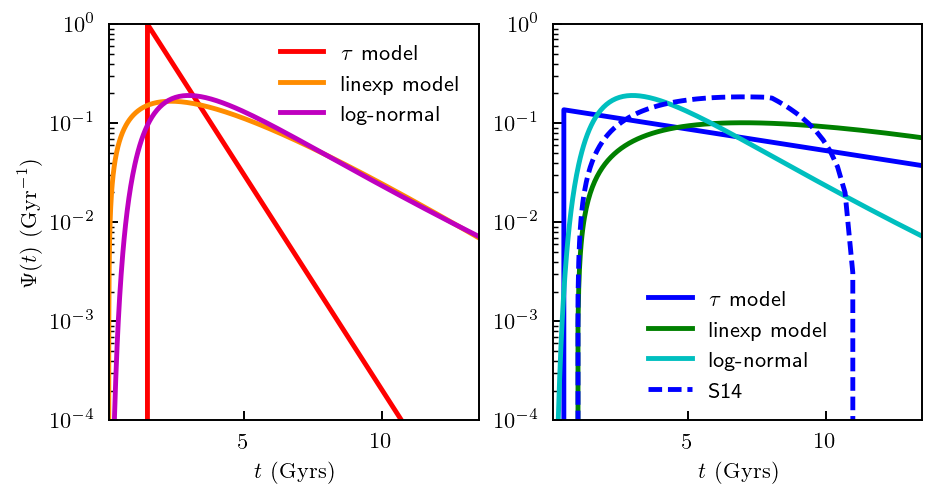

In [8]:
def sfr_tau(t,ti,tau,tu):
    A_tau = 1.0/(1.0-np.exp(-(tu-ti)/tau))/tau
    psi_tau = A_tau*np.exp(-(t-ti)/tau)*(t-ti)/np.abs(t-ti)
    psi_tau = np.clip(psi_tau, 0.0, 1.e7)
    
    return psi_tau

def sfr_linexp(t,ti,tau,tu):
    A_tau = 1.0/(-np.exp(-(tu-ti)/tau)-np.exp(-(tu-ti)/tau)*(tu-ti)/tau-np.exp(ti/tau)*(ti/tau-1.0))
    psi_tau = A_tau*np.exp(-(t-ti)/tau)*(t-ti)/tau**2
    #psi_tau = np.clip(psi_tau, 0.0, 1.e7)
    
    return psi_tau

def sfr_s14(t,ti,tau,ttr,gamma,tu):
    A_tau = 1.0/(-np.exp(-(ttr-ti)/tau)-np.exp(-(ttr-ti)/tau)*(ttr-ti)/tau-np.exp(ti/tau)*(ti/tau-1.0) +
                 (tu-ttr)*(ttr-ti)*np.exp(-(ttr-ti)/tau)/tau**2 + 0.5*gamma*(tu-ttr)**2)
    psi_tau = np.exp(-(t-ti)/tau)*(t-ti)/tau**2*(ttr-t)/np.abs(ttr-t)
    psi_tau = np.clip(psi_tau,0.0,1.e7) * A_tau
    indt = (t>ttr)
    psi_tau[indt] = A_tau*(np.exp(-(ttr-ti)/tau)*(ttr-ti)/tau**2+gamma*(t[indt]-ttr))

    return psi_tau

def sfr_LN(t,t0,tau):
    return np.exp(-0.5*(np.log(t)-np.log(t0)-np.log(tau)**2)**2/(np.log(tau)**2))/np.log(tau)/np.sqrt(2.*np.pi)/t

lt = np.linspace(-1.,10.2,1000)
t = np.power(10.,lt)

tu = 13.65
tau = 1.0; ti=1.5
psi_tau = sfr_tau(t,ti,tau,tu)

t0 = 3.0; tau = 1.8
psi_LN = sfr_LN(t,t0,tau)

tau = 2.25; ti=.1
psi_linexp = sfr_linexp(t,ti,tau,tu)

#
# plot
#
fig, ax = plt.subplots(1,2,figsize=(6, 3))
plt.rc('font',size=9)

ax[0].set_xlabel(r'$t\ \mathrm{(Gyrs)}$')
ax[0].set_ylabel(r'$\Psi(t)\ (\mathrm{Gyr^{-1}})$')
#plt.xscale('log'); 
ax[0].set_yscale('log')
ax[0].set_xlim(0.1, 13.5); ax[0].set_ylim(1.e-4, 1.0)

ax[0].plot(t, psi_tau, c='r', lw=2.0, label=r'$\tau$ model')
ax[0].plot(t, psi_linexp, c='darkorange', lw=2.0, label=r'linexp model')
ax[0].plot(t, psi_LN, c='m', lw=2.0, label='log-normal')

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels,frameon=False, loc='upper right',fontsize=9)

tu = 13.65
tau = 10.0; ti=.5
psi_tau = sfr_tau(t,ti,tau,tu)

t0 = 3.0; tau = 1.8
psi_LN = sfr_LN(t,t0,tau)

tau = 6.; ti=1.
psi_linexp = sfr_linexp(t,ti,tau,tu)

tau = 6.; ti=1.; ttr = 8; gamma=-0.02
psi_s14 = sfr_s14(t,ti,tau,ttr,gamma,tu)

ax[1].set_yscale('log')
ax[1].set_xlim(0.1, 13.5); ax[1].set_ylim(1.e-4, 1.0)
ax[1].set_xlabel(r'$t\ \mathrm{(Gyrs)}$')

ax[1].plot(t, psi_tau, c='b', lw=2.0, label=r'$\tau$ model')
ax[1].plot(t, psi_linexp, c='g', lw=2.0, label=r'linexp model')
ax[1].plot(t, psi_LN, c='c', lw=2.0, label='log-normal')
ax[1].plot(t, psi_s14, '--', c='b', lw=2.0, label='S14')

plt.legend(frameon=False, loc='lower center',fontsize=9)
plt.savefig('fig/SFH_models.png',bbox_inches='tight')
plt.show()

### Models of star formation histories 

The left plot shows models with parameters considered to be appropriate for red galaxies that have no star formation at late times (or low levels). The star formation rate is shown for a population of $1\ M_\odot$ per Gyr. So to get it for say a galaxy with stellar mass $M_\star = 10^{11}\ M_\odot$, multiply this rate by $M_\star$ to get rate of star formation in units of $M_\odot/\mathrm{Gyr}$. The x-axis shows time: early times (high redshift) are on the left, while late times are on the right of the axes. The age of the Universe at $z=0$ is $\approx 13.7$ Gyrs in the assumed cosmological model. 

The right plot shows models with parameters more appropriate for blue, star-forming galaxies. The dashed line shows the model of Simha et al. (2014) motivated by star formation histories in galaxy formation simulations. It illustrates greater flexibility of this model (due to more parameters): in this case this flexibility allows to cut off star formation sharply at late times. 

<img width=700 src="http://astro.uchicago.edu/~andrey/classes/a304/fig/SFH_models.png"></img>

### Star formation histories and evolution of colors and mass-to-light ratios

Below use the python library <a href="http://www.baryons.org/ezgal/">EzGal</a> designed to manipulate outputs of different SPS models and given SFH splice them into observed SED or broad-band colors derived from it. To learn more about the code, see its <a href="http://www.baryons.org/ezgal/manual/">online manual</a> (also available as <a href="http://www.baryons.org/ezgal/manual.pdf">PDF</a>) and a general paper by <a href="http://adsabs.harvard.edu/abs/2012PASP..124..606M">Mancone & Gonzalez (2012)</a> describing the approach. You can download EzGal from its <a href="https://github.com/dpgettings/ezgal">github site.</a> See instructions for how to install the library and download associated data files <a href="http://www.baryons.org/ezgal/download.php">here</a>. Essentially, you need to download the gzipped file, unpack it, and place it into the site-packages subdirectory within your python distro, or anywhere where python path variable knows to lool. Additionally, download the data files used below from the regular place, where I share the data (or directly from the EzGal site above).

Below I use single stellar population model from the SPS model of <a href="http://adsabs.harvard.edu/abs/2009ApJ...699..486C">Conroy et al. 2009</a> to predict evolution of $g-r$ color and $r$-band mass-to-light ratio as a function of time for several star formation history assumptions. We compare the evolution to the widely used calibrations of <a href="http://adsabs.harvard.edu/abs/2003ApJS..149..289B">Bell et al. (2003)</a> (just check the number of citations Bell et al. paper received at the ADS link below) and <a href="http://adsabs.harvard.edu/abs/2009MNRAS.400.1181Z">Zibetti et al. (2009)</a> (see their Appendices). 

In [20]:
import numpy as np
import pylab as plt
import ezgal

from code.setup import data_home_dir

sdss_filters = {'sloan_u','sloan_g','sloan_r','sloan_i','sloan_z'}
modelfile1 = data_home_dir()+"ezgal\models\c09_ssp_z_0.019_chab.model"

model = ezgal.model( modelfile1 )

    
# define an exponentially decaying sfh with a setable e-folding length
# ezgal will pass ages in Gyrs; the SFH can be unnormalized
# see http://www.baryons.org/ezgal/manual/modifying_models.html#csps-arbitrary-star-formation-histories

def sfr_tau(t,tau):
    return np.exp(-1.0*t/tau)    

def sfr_linexp(t,tau):
    return np.exp(-1.0*t/tau)*t/tau    

print "constructing CSPs..."
# now generate two CSPs with tau = 1.0 and 2.0 (Gyrs)
tau_1 = model.make_csp( sfr_tau, args=(1.0,) )
tau_2 = model.make_csp( sfr_linexp, args=(2.0,) )

print "getting age grid..."
# now plot age versus absolute mag
# ezgal does everything in redshift space, so we first have to get some redshifts
zf = 5.0
zs = model.get_zs( zf )
ages = model.get_age( zf, zs )

# get magnitudes
MrSSP = model.get_absolute_mags( zf, filters='sloan_r', zs=zs )
MgSSP = model.get_absolute_mags( zf, filters='sloan_g', zs=zs )
MuSSP = model.get_absolute_mags( zf, filters='sloan_u', zs=zs )
MLrSSP = model.get_rest_ml_ratios( zf, filters='sloan_r', zs=zs )
Mr1 = tau_1.get_absolute_mags( zf, filters='sloan_r', zs=zs )
Mg1 = tau_1.get_absolute_mags( zf, filters='sloan_g', zs=zs )
Mu1 = tau_1.get_absolute_mags( zf, filters='sloan_u', zs=zs )

MLr1 = tau_1.get_rest_ml_ratios( zf, filters='sloan_r', zs=zs )
Mr2 = tau_2.get_absolute_mags( zf, filters='sloan_r', zs=zs )
Mg2 = tau_2.get_absolute_mags( zf, filters='sloan_g', zs=zs )
Mu2 = tau_2.get_absolute_mags( zf, filters='sloan_u', zs=zs )
MLr2 = tau_2.get_rest_ml_ratios( zf, filters='sloan_r', zs=zs )

# get g-r colors
grSSP = MgSSP - MrSSP
gr1 = Mg1 - Mr1
gr2 = Mg2 - Mr2
urSSP = MuSSP - MrSSP
ur1 = Mu1 - Mr1
ur2 = Mu2 - Mr2


constructing CSPs...
getting age grid...


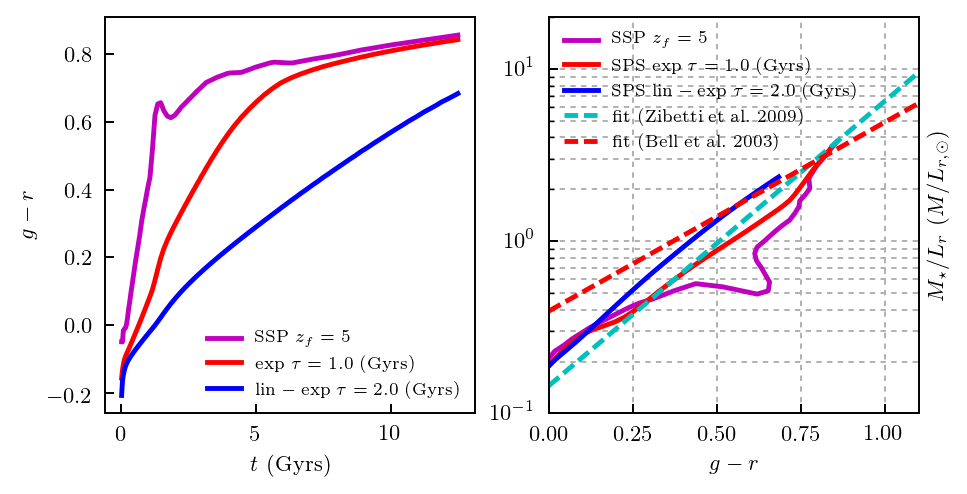

In [27]:
#
# plot
#
fig,ax = plt.subplots(1,2,figsize=(6, 3))
plt.rc('font',size=9)

ax[0].set_xlabel( r'$t\ \mathrm{(Gyrs)}$' ); ax[0].set_ylabel( r'$g-r$' )

plt.xlim(0.1, 13.5)
#plt.ylim(1.e-4, 5.0)

ax[0].plot( ages, grSSP, 'm-', lw=2.0, label='$\mathrm{SSP}\ z_f=5$' )
ax[0].plot( ages, gr1, 'r-', lw=2.0, label=r'$\mathrm{exp}\ \tau=1.0\ \mathrm{(Gyrs)}$')
ax[0].plot( ages, gr2, 'b-', lw=2.0, label=r'$\mathrm{lin-exp}\ \tau=2.0\ \mathrm{(Gyrs)}$')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels,frameon=False, loc='lower right',fontsize=7)

ax[1].set_xlabel( r'$g-r$' ); ax[1].set_ylabel( r'$M_\star/L_r\ (M/L_{r,\odot})$' )
ax[1].set_yscale('log')
ax[1].set_xlim(0., 1.1); ax[1].set_ylim(0.1, 20.)
ax[1].yaxis.set_label_position('right')

plt.plot( grSSP, MLrSSP, 'm-', lw=2.0, label='$\mathrm{SSP}\ z_f=5$' )
plt.plot( gr1, MLr1, 'r-', lw=2.0, label=r'$\mathrm{SPS\ exp}\ \tau=1.0\ \mathrm{(Gyrs)}$')
plt.plot( gr2, MLr2, 'b-', lw=2.0, label=r'$\mathrm{SPS\ lin-exp}\ \tau=2.0\ \mathrm{(Gyrs)}$')

# plot the relation expected from the SPS models by Zibetti et al. (2009; see their Appendix B.2). 
# and Bell, E. et al. (2003; see their Appendix)
xur = np.linspace(0.,3.5,100)
# M/L - g-r
lMLrzib = -0.840 + 1.654*xur
lMLrbell = -.306 + 1.097*xur - 0.1
# M/L - u-r
#lMLrzib = -1.157 + 0.672*xur
#lMLrbell = -.223 + 0.299*xur - 0.1

plt.plot(xur,10.**lMLrzib, '--',c='c', lw=2, label=r'$\mathrm{fit\ (Zibetti\ et\ al.\ 2009)}$')
plt.plot(xur,10.**lMLrbell, '--',c='r', lw=2, label=r'$\mathrm{fit\ (Bell\ et\ al.\ 2003)}$')

# some labels
plt.legend(frameon = False, loc='upper left', fontsize=7)
plt.grid(linestyle='dotted', which='both')
plt.savefig('fig/MLcolor_sps.png',bbox_inches='tight')

plt.show()

The left panel shows how the g-r color reddens as a function of time for different star formation histories (SFHs). We can see that effect is large. The effect of SFHs on $M_\star/L_r$ is smaller, but is still non-negligible. The variation is definitely not captured by simple power law fits of Bell et al. (2003) and Zibetti et al. (2009), although the overall trend is captured (sort of). Note also that at the last time point, all model calculations actually lie on the calibration relation.   

As discussed in class assumption about the form of the IMF is another key factor affecting SPS results. Repeat the calculation above for the Salpeter IMF (the same file name, but subscript <tt>salp</tt> instead of <tt>chab</tt>. What is the effect of the IMF change on the evolution of color and mass-to-light ratio? 

Explore another widely used model by Bruzual & Charlot (2007): EzGal model file <tt>cb07_ssp_z_0.02_chab.model</tt>. How different are results of this model for the evolution of color and mass-to-light ration from the results of the Conroy et al (2009) model above. 

<img width=1000 src="http://astro.uchicago.edu/~andrey/classes/a304/fig/MLcolor_sps.png"></img>

### Stellar mass of the Milky Way

We can see that for the color of the Milky Way, $g-r\approx 0.68\pm 0.07$, we can expect $M_\star/L_r\approx 2.5-3\ M_\odot/L_{r,\odot}$. Thus, the stellar mass of the Milky Way is 
<br>
$$M_{\star,\rm MW}\approx 9\times 10^{9}\times 2.5\div 3\approx 2-3\times 10^{10}\ M_\odot$$. 

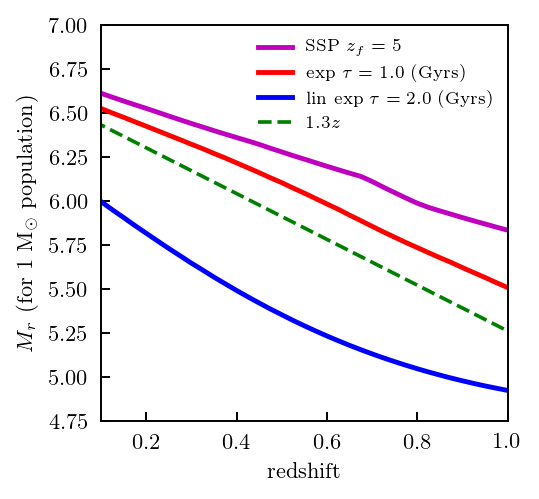

In [33]:
#
# plot
#
fig,ax = plt.subplots(1,1,figsize=(3, 3))
plt.rc('font',size=9)

ax.set_xlabel( r'$\mathrm{redshift}$' ); ax.set_ylabel( r'$M_r\ (\mathrm{for\ 1\ M_\odot\ population})$' )

plt.xlim(0.1, 1.); plt.ylim(4.75, 7.0)

Mrpowl = 6.3 - 1.3*(zs-0.2)
ax.plot( zs, MrSSP, 'm-', lw=2.0, label='$\mathrm{SSP}\ z_f=5$' )
ax.plot( zs, Mr1, 'r-', lw=2.0, label=r'$\mathrm{exp}\ \tau=1.0\ \mathrm{(Gyrs)}$')
ax.plot( zs, Mr2, 'b-', lw=2.0, label=r'$\mathrm{lin\ exp}\ \tau=2.0\ \mathrm{(Gyrs)}$')
ax.plot( zs, Mrpowl, 'g--', lw=1.5, label=r'$1.3z$')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,frameon=False, loc='lower right',fontsize=9)

# some labels
plt.legend(frameon = False, loc='upper right', fontsize=7)
plt.savefig('fig/Mrz_sps.png',bbox_inches='tight')

plt.show()

### Evolution of absolute magnitude

<img align=left width=600 src="http://astro.uchicago.edu/~andrey/classes/a304/fig/Mrz_sps.png"></img>

### Recall this:

We can see where the $1.3z$ evolution correction (shown by the orange line in the plot below) comes from:

<img align=left width=600 src="http://astro.uchicago.edu/~andrey/classes/a304/fig/Mabsz_sdss.png"></img>